In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.sample(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
387,Female,37.000000,1.500000,75.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Motorbike,Obesity_Type_I
1329,Female,23.474165,1.577115,78.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.876101,0.000000,no,Public_Transportation,Obesity_Type_I
890,Female,18.236087,1.620000,69.389900,yes,yes,2.223990,1.000000,Sometimes,no,2.203120,no,0.104451,1.899073,no,Public_Transportation,Overweight_Level_I
1677,Male,30.108216,1.841908,124.070717,yes,yes,2.467548,3.000000,Sometimes,no,2.660290,no,0.994422,0.310394,Sometimes,Public_Transportation,Obesity_Type_II
1343,Male,18.000000,1.783906,109.207614,yes,yes,2.000000,1.867836,Sometimes,no,2.438398,no,1.000000,0.802305,no,Public_Transportation,Obesity_Type_I
839,Male,19.789291,1.820643,85.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.759246,no,1.763277,0.453314,Sometimes,Public_Transportation,Overweight_Level_I


**Eating habits attributes:**

- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

**Physical condition attributes:**
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:

def skewness_based_on_mean_median(data):
    """
    Calculate skewness based on mean and median.

    """
    mean_val = np.mean(data).round(2)
    median_val = np.median(data).round(2)
    
    skewness = 3 * (mean_val - median_val) / np.std(data)
    print(f"Skewness based on mean {mean_val} and median {median_val} -->  {np.round(skewness, 2)}")
    
    if skewness > 0:
        print(f"The distribution is right-skewed.")
    elif skewness < 0:
        print(f"The distribution is left-skewed.")
    else:
        print(f"The distribution is approximately symmetric.")
    
    return skewness

In [5]:
numerical_features = df.select_dtypes(include=['number']).columns
for nfeat in numerical_features : 
    print (nfeat)
    skewness_based_on_mean_median(df[nfeat])
    print('*'*20)


Age
Skewness based on mean 24.31 and median 22.78 -->  0.72
The distribution is right-skewed.
********************
Height
Skewness based on mean 1.7 and median 1.7 -->  0.0
The distribution is approximately symmetric.
********************
Weight
Skewness based on mean 86.59 and median 83.0 -->  0.41
The distribution is right-skewed.
********************
FCVC
Skewness based on mean 2.42 and median 2.39 -->  0.17
The distribution is right-skewed.
********************
NCP
Skewness based on mean 2.69 and median 3.0 -->  -1.2
The distribution is left-skewed.
********************
CH2O
Skewness based on mean 2.01 and median 2.0 -->  0.05
The distribution is right-skewed.
********************
FAF
Skewness based on mean 1.01 and median 1.0 -->  0.04
The distribution is right-skewed.
********************
TUE
Skewness based on mean 0.66 and median 0.63 -->  0.15
The distribution is right-skewed.
********************


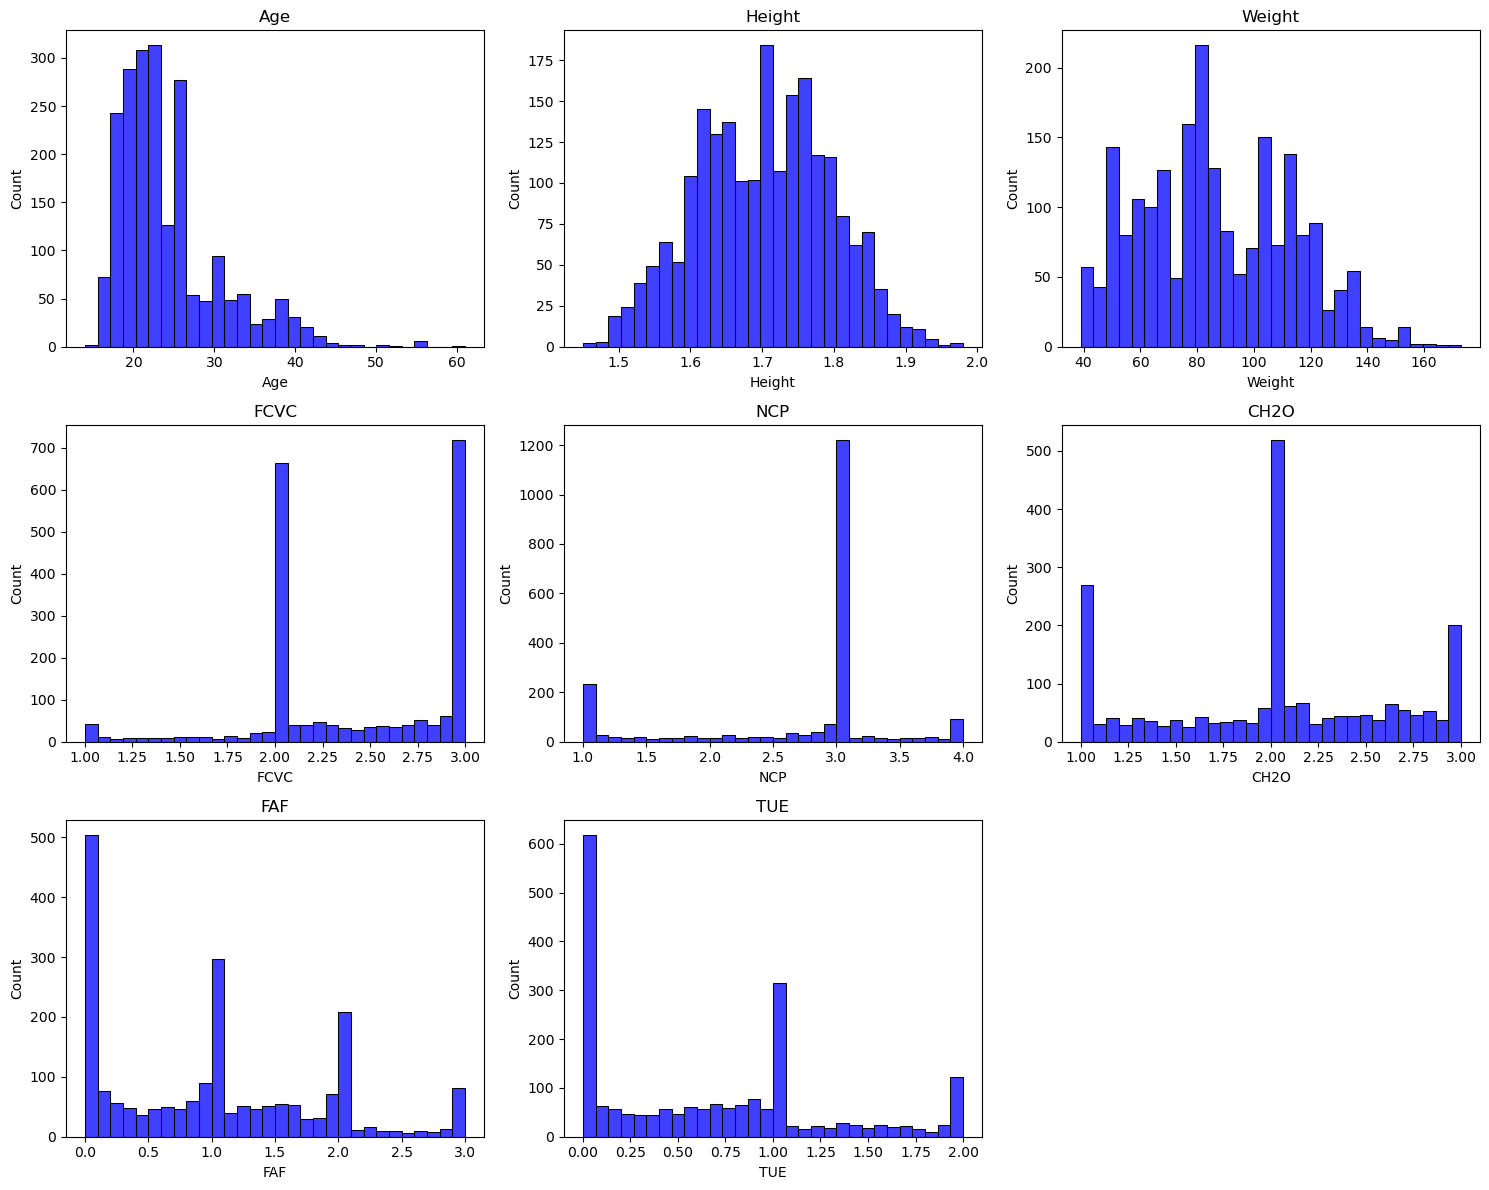

In [6]:
# Create a figure to hold the subplots
plt.figure(figsize=(15, 12), tight_layout=True)

# Loop through each column and create a histogram
for i, column in enumerate(df[numerical_features].columns, 1):
    plt.subplot((len(numerical_features) // 3) + 1, 3, i)  # Create subplots in a 3-column layout
    sns.histplot(df[column], kde=False, bins=30, color='blue')  # Plot histogram
    plt.title(column)

In [7]:
## Corelation and covariance matrix

In [8]:
df[numerical_features].cov()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,40.271313,-0.015370,33.667180,0.055198,-0.216968,-0.176222,-0.782353,-1.147409
Height,-0.015370,0.008706,1.131795,-0.001899,0.017689,0.012203,0.023389,0.002949
Weight,33.667180,1.131795,685.977477,3.022323,2.189976,3.220031,-1.145898,-1.141298
FCVC,0.055198,-0.001899,3.022323,0.285078,0.017537,0.022406,0.009056,-0.032881
NCP,-0.216968,0.017689,2.189976,0.017537,0.605344,0.027225,0.085705,0.017210
CH2O,-0.176222,0.012203,3.220031,0.022406,0.027225,0.375712,0.087193,0.004466
FAF,-0.782353,0.023389,-1.145898,0.009056,0.085705,0.087193,0.723507,0.030332
TUE,-1.147409,0.002949,-1.141298,-0.032881,0.017210,0.004466,0.030332,0.370792


<Axes: >

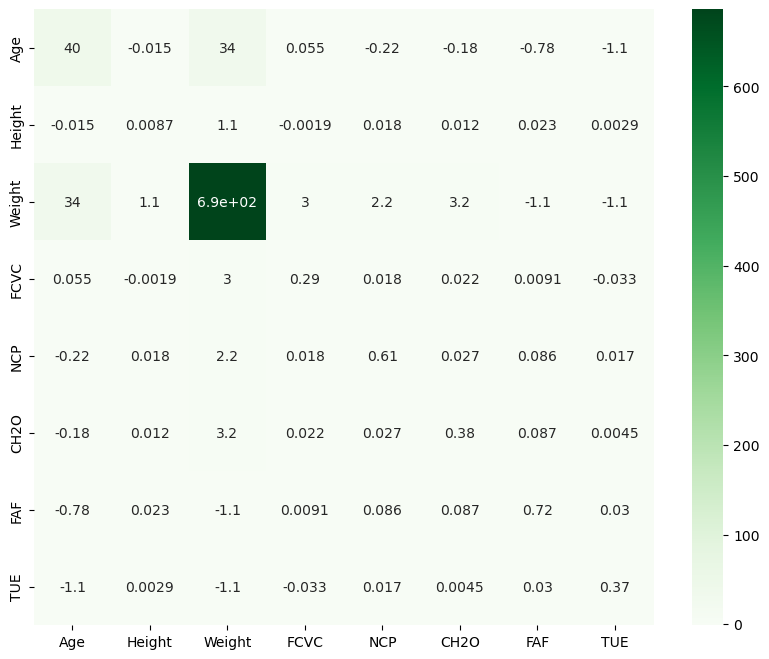

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].cov(), cmap="Greens", annot=True)

<Axes: >

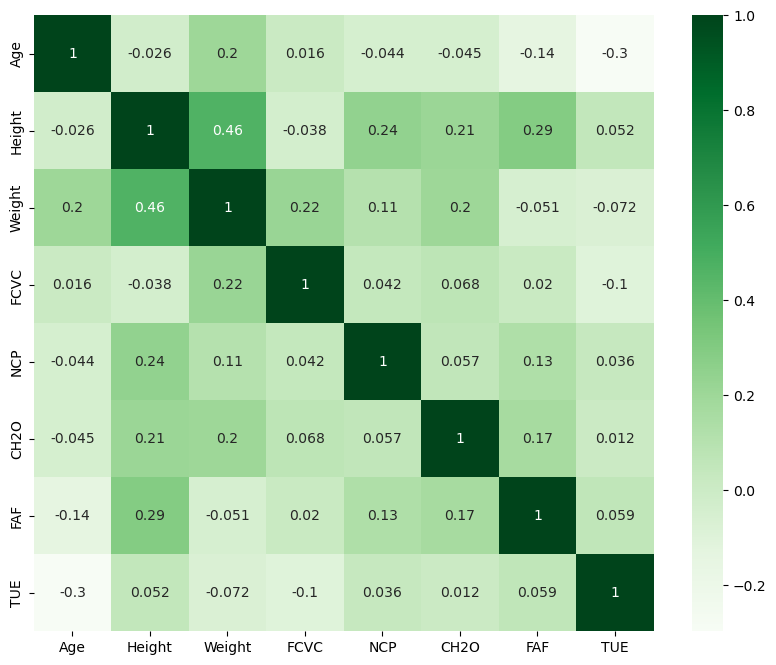

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), cmap="Greens", annot=True)

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


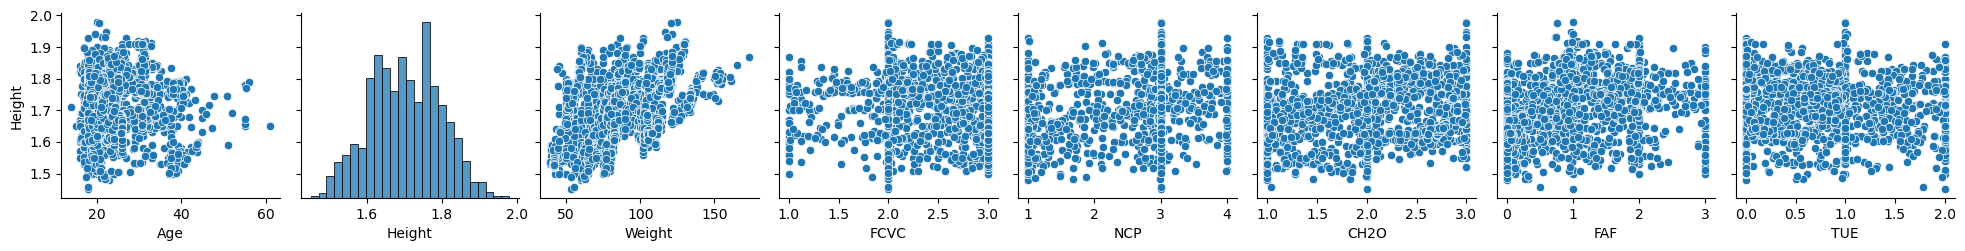

In [11]:
sns.pairplot(df[numerical_features], y_vars='Height')

### for outliers

<Axes: >

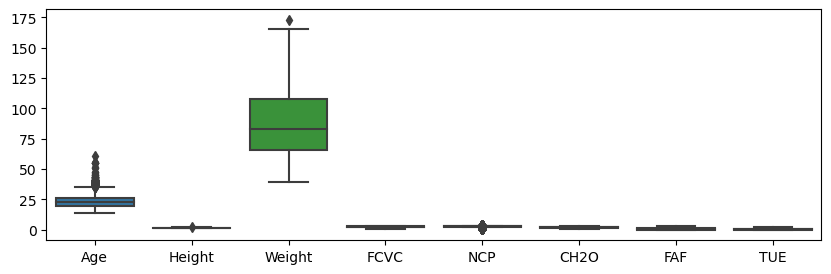

In [12]:
plt.figure(figsize=(10, 3))
sns.boxplot(df[numerical_features], orient='v')

In [13]:
feature = ['FCVC' , 'FAF']
df[feature]

,FCVC,FAF
0,2.0,0.000000
1,3.0,3.000000
2,2.0,2.000000
3,3.0,2.000000
4,2.0,0.000000
...,...,...
2106,3.0,1.676269
2107,3.0,1.341390
2108,3.0,1.414209
2109,3.0,1.139107


In [14]:
scalar = StandardScaler()
df1 = pd.DataFrame(scalar.fit_transform(df[feature]), columns=feature)
df1.head()

,FCVC,FAF
0,-0.785019,-1.188039
1,1.088342,2.339750
2,-0.785019,1.163820
3,1.088342,1.163820
4,-0.785019,-1.188039


In [15]:
def calculate_euclidean_distance(data_point1, data_point2):
    distance = np.sqrt(data_point1 -data_point2)**2
    return distance

In [19]:
print(calculate_euclidean_distance(df1.iloc[0].values[0], df1.iloc[0].values[1])),
print(calculate_euclidean_distance(df1.iloc[-1].values[0], df1.iloc[-1].values[1]))


0.40302040899202457
1.0693454285689692


In [ ]:
min_max1 = np.array([df1['FCVC'].min(), df1['FCVC'].max()])

In [ ]:
min_max2 = np.array([df1['FAF'].min(), df1['FAF'].max()])

In [ ]:
from numpy import linalg 

In [ ]:
linalg.norm(min_max1) , linalg.norm(min_max2)

In [ ]:
df

In [23]:
original_df = df

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

In [59]:


# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return np.sqrt(distance)  # Hint: Final distance formula calculation step

# Function to predict the label of a new data point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])  # Hint: Calculate distance
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in train_data[:num_neighbors]]  # Hint: Neighbors selection

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction





In [46]:
original_df['Gender']

0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender, Length: 2111, dtype: int32

In [49]:
original_df[['Age', 'Height', 'Weight', 'Gender']]

,Age,Height,Weight,Gender
0,-0.522124,-0.875589,-0.862558,0
1,-0.522124,-1.947599,-1.168077,0
2,-0.206889,1.054029,-0.366090,1
3,0.423582,1.054029,0.015808,1
4,-0.364507,0.839627,0.122740,1
...,...,...,...,...
2106,-0.525774,0.097045,1.711763,0
2107,-0.367195,0.502844,1.800914,0
2108,-0.281909,0.541672,1.798868,0
2109,0.007776,0.404927,1.785780,0


In [53]:
# Encoding the 'Gender' column
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])  # Hint: Fit and apply encoding

# Scaling the features
scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New data point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])
new_data_df

,Gender,Age,Height,Weight
0,Male,32,175,75


In [61]:
from collections import Counter


In [63]:
original_df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [67]:
# Encoding and scaling the new data point
new_data_df['Gender'] = label_encoder.fit_transform(new_data_df['Gender'])  # Hint: Apply existing encoding
new_data_scaled = scaler.fit_transform(new_data_df[['Age', 'Height', 'Weight']])  # Hint: Apply existing scaling

new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the label
predicted_label = predict_label(original_df[['Age', 'Height', 'Weight']], new_data_point, 5)
print(f"The predicted label is: {predicted_label}")

IndexError: index 2 is out of bounds for axis 0 with size 2

In [66]:
original_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,-0.522124,-1.947599,-1.168077,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,-0.206889,1.054029,-0.366090,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,0.423582,1.054029,0.015808,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,-0.364507,0.839627,0.122740,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,-0.367195,0.502844,1.800914,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,-0.281909,0.541672,1.798868,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,0.007776,0.404927,1.785780,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
